In [2]:
import sys
sys.path.insert(0, "C:\\Users\\matt\\Desktop\\orbithunter\\")
from orbithunter import *
import numpy as np
import matplotlib.pyplot as plt
from math import pi

Each spatiotemporal solution to the KSE is a scalar spatiotemporal velocity field $u(t,x)$ which satisfies the equation
\begin{equation}
F(u) = u_t + u_{xx}+ u_{xxxx} + \frac{1}{2}\partial_x u^2 = 0
\end{equation}
$u(t, x)$

state $\equiv \phi$

In [103]:
from orbithunter.core import Orbit
import numpy as np

class OrbitHN(Orbit):
    def __init__(self, state=None, basis='field', parameters=(0, 0), **kwargs):
        # state is numpy array
        self.state = state
        self.T = parameters[0]
        self.basis = 'field'

    def dae(self, **kwargs):
        F = np.roll(self.state, -1)+1.4*(self.state**2)-0.3*np.roll(self.state, 1)-1
        return OrbitHN(state=F.ravel(), parameters=(len(F), 1))

    def jacobian(self, **kwargs):
        J = (2*1.4*np.diag(self.state.ravel()) + np.roll(np.eye(len(self.state)), 1, axis=1)
             -0.3*np.roll(np.eye(len(self.state)), -1, axis=1))
        return J
    
    def dae_matrep(self, **kwargs):
        J = 1.4*np.diag(self.state.ravel()) + np.roll(np.eye(len(self.state)), 1, axis=1) - 0.3*np.roll(np.eye(len(self.state)), -1, axis=1)
        return np.dot(J, self.state.ravel()) - 1

    def residual(self, **kwargs):
        F = self.dae().state
        return 0.5 * F.dot(F)

    def from_numpy_array(self, state, **kwargs):
        return OrbitHN(state=state.ravel(), parameters=(len(state), 1))
    
    def plot(self):
        fig, ax = plt.subplots()
        plt.plot(range(len(self.state)), self.state)
        plt.ylabel('$\phi_{n}$')
        plt.xlabel('$n$')
        plt.plot()
        return None

    @property
    def shape(self):
        return self.state.size

$F_n = \phi_{n+1}+a\phi^{2}_n - b\phi_{n+1} -1 = 0$

$a = 1.4\\
b = 0.3$

$\phi_n = [1, 2, 3, 4, 5] \\
\phi_{n-1} = [5, 1, 2, 3, 4] \\
\phi_{n+1} = [2, 3, 4, 5, 1]$

$\phi_1=1$, $\phi_2=2$

$J x = -F$

I forgot how to write things spatiotemporally until now. ***Always*** write it in terms of a single state vector; i.e. linear operators applied to $\phi$. For a state vector $\phi$ ordered as follows, $\phi=[\phi_0, \phi_1, \phi_2, \dots]^{\top}$ the following is how the Henon map can be written (for a 4-cycle)

\begin{equation}
F(\phi)
=
\Bigg(
a\,\mathrm{diag}(\phi)
+
\begin{bmatrix}
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
1 & 0 & 0 & 0 \\
\end{bmatrix}
+
\begin{bmatrix}
0 & 0 & 0 & -b \\
-b & 0 & 0 & 0 \\
0 & -b & 0 & 0 \\
0 & 0 & -b & 0 \\
\end{bmatrix}
\Bigg)\cdot\phi
\end{equation}
The Jacobian follows thereafter
\begin{equation}
\frac{\partial F}{\partial\phi}
=
\Bigg(
2a\,\mathrm{diag}(\phi)
+
\begin{bmatrix}
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
1 & 0 & 0 & 0 \\
\end{bmatrix}
+
\begin{bmatrix}
0 & 0 & 0 & -b \\
-b & 0 & 0 & 0 \\
0 & -b & 0 & 0 \\
0 & 0 & -b & 0 \\
\end{bmatrix}
\Bigg)
\end{equation}



In [104]:
np.random.seed(99)
phi = (np.random.rand(4))-0.5
x = OrbitHN(state=phi,parameters=(8, 1))
a = 1.4
b = 0.3

In [105]:
x.jacobian()

array([[ 0.48237996,  1.        ,  0.        , -0.3       ],
       [-0.3       , -0.03338048,  1.        ,  0.        ],
       [ 0.        , -0.3       ,  0.91138649,  1.        ],
       [ 1.        ,  0.        , -0.3       , -1.31195011]])

In [106]:
nonlinear_term = a*np.diag(x.state)
nonlinear_term

array([[ 0.24118998,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.01669024,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.45569324,  0.        ],
       [ 0.        ,  0.        ,  0.        , -0.65597506]])

In [88]:
plus_one_term = np.roll(np.eye(4), 1, axis=1)
plus_one_term

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [89]:
minus_one_term = -b*np.roll(np.eye(4), -1, axis=1)
minus_one_term

array([[-0. , -0. , -0. , -0.3],
       [-0.3, -0. , -0. , -0. ],
       [-0. , -0.3, -0. , -0. ],
       [-0. , -0. , -0.3, -0. ]])

In [90]:
identity_term = - np.eye(4)
identity_term

array([[-1., -0., -0., -0.],
       [-0., -1., -0., -0.],
       [-0., -0., -1., -0.],
       [-0., -0., -0., -1.]])

In [99]:
F = (nonlinear_term+plus_one_term+minus_one_term).dot(x.state).ravel()-1

In [100]:
F, x.dae().state

(array([-0.82980365, -0.72598942, -1.31665118, -0.61801051]),
 array([-0.82980365, -0.72598942, -1.31665118, -0.61801051]))

In [75]:
np.roll(x.state, -1), plus_one_term.dot(x.state)

(array([-0.0119216 ,  0.32549517, -0.46855361,  0.17227856]),
 array([-0.0119216 ,  0.32549517, -0.46855361,  0.17227856]))

In [78]:
-0.3*np.roll(x.state, 1), minus_one_term.dot(x.state)

(array([ 0.14056608, -0.05168357,  0.00357648, -0.09764855]),
 array([ 0.14056608, -0.05168357,  0.00357648, -0.09764855]))

In [79]:
1.4*(x.state**2), nonlinear_term.dot(x.state)

(array([4.15518625e-02, 1.98974391e-04, 1.48325952e-01, 3.07359483e-01]),
 array([4.15518625e-02, 1.98974391e-04, 1.48325952e-01, 3.07359483e-01]))

In [83]:
(nonlinear_term.dot(x.state)+minus_one_term.dot(x.state)+plus_one_term.dot(x.state)-1,
np.roll(x.state, -1)+1.4*(x.state**2)-0.3*np.roll(x.state, 1)-1)

(array([-0.82980365, -0.72598942, -1.31665118, -0.61801051]),
 array([-0.82980365, -0.72598942, -1.31665118, -0.61801051]))

In [114]:
for seed in range(100):
    np.random.seed(seed)
    phi = 10*(np.random.rand(16))-5
    x = OrbitHN(state=phi,  parameters=(16, 1))
    y = converge(x, method='lstsq', verbose=True, tol=1e-8)
    if y.status==-1:
        break


-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 1476.1346636829585
Target residual tolerance : 1e-08
Maximum iteration number : 250
Initial guess : OrbitHN({"basis": "field", "parameters": ["0.0"], "field_shape": ["0"]})
-------------------------------------------------------------------------------------------------
####
Stalled. Exiting with residual=0.09799983782338884

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 1570.0189075618714
Target residual tolerance : 1e-08
Maximum iteration number : 250
Initial guess : OrbitHN({"basis": "field", "parameters": ["0.0"], "field_shape": ["0"]})
-------------------------------------------------------------------------------------------------
###
Stalled. Exiting with residual=0.1676292304824296

-------------------------------------------------------

#######
Stalled. Exiting with residual=0.5010739433046787

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 2213.1726067657887
Target residual tolerance : 1e-08
Maximum iteration number : 250
Initial guess : OrbitHN({"basis": "field", "parameters": ["0.0"], "field_shape": ["0"]})
-------------------------------------------------------------------------------------------------
####
Stalled. Exiting with residual=0.4469036299214051

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 1763.814270128606
Target residual tolerance : 1e-08
Maximum iteration number : 250
Initial guess : OrbitHN({"basis": "field", "parameters": ["0.0"], "field_shape": ["0"]})
-------------------------------------------------------------------------------------------------
####
Stalled. Exiting with residual=0.6098139669398244

###
Stalled. Exiting with residual=0.8381851611024547

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 2736.694824893364
Target residual tolerance : 1e-08
Maximum iteration number : 250
Initial guess : OrbitHN({"basis": "field", "parameters": ["0.0"], "field_shape": ["0"]})
-------------------------------------------------------------------------------------------------
###
Stalled. Exiting with residual=0.48980052318589373

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 1731.631206842216
Target residual tolerance : 1e-08
Maximum iteration number : 250
Initial guess : OrbitHN({"basis": "field", "parameters": ["0.0"], "field_shape": ["0"]})
-------------------------------------------------------------------------------------------------
###
Stalled. Exiting with residual=0.35710108297951715

---

####
Stalled. Exiting with residual=0.6195070362948201

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 2390.7596907733614
Target residual tolerance : 1e-08
Maximum iteration number : 250
Initial guess : OrbitHN({"basis": "field", "parameters": ["0.0"], "field_shape": ["0"]})
-------------------------------------------------------------------------------------------------
####
Stalled. Exiting with residual=1.337513537747057

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 2871.8198030488434
Target residual tolerance : 1e-08
Maximum iteration number : 250
Initial guess : OrbitHN({"basis": "field", "parameters": ["0.0"], "field_shape": ["0"]})
-------------------------------------------------------------------------------------------------
#####
Stalled. Exiting with residual=0.45517906707884825


######
Stalled. Exiting with residual=0.3011874537166348

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 1045.8915759117517
Target residual tolerance : 1e-08
Maximum iteration number : 250
Initial guess : OrbitHN({"basis": "field", "parameters": ["0.0"], "field_shape": ["0"]})
-------------------------------------------------------------------------------------------------
######
Stalled. Exiting with residual=1.6377091162967234

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 504.63835538539536
Target residual tolerance : 1e-08
Maximum iteration number : 250
Initial guess : OrbitHN({"basis": "field", "parameters": ["0.0"], "field_shape": ["0"]})
-------------------------------------------------------------------------------------------------
###
Stalled. Exiting with residual=1.484529833189785

######
Stalled. Exiting with residual=2.046013945490185

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 1358.407970002364
Target residual tolerance : 1e-08
Maximum iteration number : 250
Initial guess : OrbitHN({"basis": "field", "parameters": ["0.0"], "field_shape": ["0"]})
-------------------------------------------------------------------------------------------------
####
Stalled. Exiting with residual=0.683308618713137

-------------------------------------------------------------------------------------------------
Starting lstsq optimization
Initial residual : 1625.113866910453
Target residual tolerance : 1e-08
Maximum iteration number : 250
Initial guess : OrbitHN({"basis": "field", "parameters": ["0.0"], "field_shape": ["0"]})
-------------------------------------------------------------------------------------------------
######
Stalled. Exiting with residual=0.5972578794445018



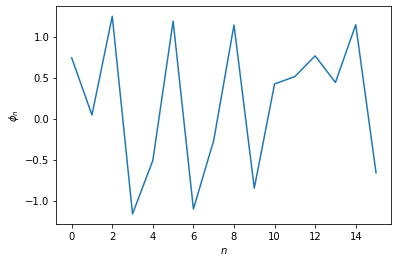

In [117]:
y.orbit.plot()

It seems that without either allowing a, b to vary or transforming to a Fourier basis, it likely will not work;
Transformation to a Fourier basis can be performed by applying/inserting the correct operators

Elementwise product in "field" basis is best written pseudospectrally.

Let $\tilde{\phi}=\mathcal{F}(\phi)$

\begin{equation}
\tilde{F}(\tilde{\phi})
=
\Bigg(
a\,(\mathcal{F}^{-1}(\tilde{\phi})\cdot(\mathcal{F}^{-1}(\phi))
+
\mathcal{F}
\cdot
\begin{bmatrix}
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
1 & 0 & 0 & 0 \\
\end{bmatrix}
\cdot\mathcal{F^{-1}}
+
\mathcal{F}
\cdot
\begin{bmatrix}
0 & 0 & 0 & -b \\
-b & 0 & 0 & 0 \\
0 & -b & 0 & 0 \\
0 & 0 & -b & 0 \\
\end{bmatrix}
\cdot\mathcal{F^{-1}}
\Bigg)\cdot\tilde{\phi}
\end{equation}
The Jacobian follows immediately
\begin{equation}


\frac{\partial F}{\partial\phi}
=
\mathcal{F}\cdot
\Bigg(
2a\,\mathrm{diag}(\phi)
+
\begin{bmatrix}
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
1 & 0 & 0 & 0 \\
\end{bmatrix}
+
\begin{bmatrix}
0 & 0 & 0 & -b \\
-b & 0 & 0 & 0 \\
0 & -b & 0 & 0 \\
0 & 0 & -b & 0 \\
\end{bmatrix}
\Bigg)
\end{equation}